In [1]:
import pandas as pd
import os
import numpy as np
import scipy as ss
import scipy.stats
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
from operator import itemgetter
data = "/Users/annasintsova/git_repos/HUTI-RNAseq/data/get_homologs_output/C50_S90_e0_/run_C50_S90_e0__pan_C50_S90/2018-02-26_pangenome_matrix_t0_crossRef.csv"

In [3]:
data = pd.read_csv(data, index_col=0)

In [29]:
#seperate into abs/pre and count matrices

pan_mat = data.iloc[:,0:16]
count_mat = data.iloc[:,16:]
count_mat.head()

,HM01_UR_counts,HM01_UR_RPKM,HM01_UTI_counts,HM01_UTI_RPKM,HM03_UR_counts,HM03_UR_RPKM,HM03_UTI_counts,HM03_UTI_RPKM,HM06_UR_counts,HM06_UR_RPKM,...,HM57_UTI_seq2_counts,HM57_UTI_seq2_RPKM,HM60_UTI_seq1_counts,HM60_UTI_seq1_RPKM,HM60_UTI_seq2_counts,HM60_UTI_seq2_RPKM,HM68_UTI_seq1_counts,HM68_UTI_seq1_RPKM,HM68_UTI_seq2_counts,HM68_UTI_seq2_RPKM
1_thrL.faa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_Hypothetical_protein.faa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6_Hypothetical_protein.faa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8_Hypothetical_protein.faa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9_Hypothetical_protein.faa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
count_mat.dropna(inplace=True)
count_mat.shape

(2725, 79)

In [5]:
to_drop = [c for c in count_mat.columns if 'counts' in c or 'seq' in c]
count_mat = count_mat.drop(to_drop, axis =1)
count_mat.head()

,HM01_UR_RPKM,HM01_UTI_RPKM,HM03_UR_RPKM,HM03_UTI_RPKM,HM06_UR_RPKM,HM06_UTI_RPKM,HM07_UR_RPKM,HM07_UTI_RPKM,HM14_UR_RPKM,HM14_UTI_RPKM,...,HM57_UR_RPKM,HM57_UTI_RPKM,HM60_UR_RPKM,HM60_UTI_RPKM,HM68_UR_RPKM,HM68_UTI_RPKM,HM66_UR_RPKM,HM66_UTI_RPKM,HM86_UR_RPKM,HM86_UTI_RPKM
359_mbhA.faa,2.57,0.12,3.45,0.59,3.90,0.07,5.13,0.02,1.36,0.10,...,1.47,0.10,2.66,0.01,6.22,0.08,0.64,0.00,1.57,0.59
363_prfH.faa,2.64,0.09,7.93,1.08,7.88,0.45,9.40,0.05,10.55,2.86,...,2.45,0.03,1.64,0.06,6.27,0.10,3.51,0.00,1.63,1.22
368_crl.faa,821.47,26.43,834.85,96.92,733.30,7.44,1181.11,6.66,1282.52,286.21,...,609.68,0.71,583.83,0.79,1160.49,7.32,468.45,0.67,462.24,137.69
398_2-5-diketo-D-gluconi...faa,72.95,1.31,49.95,4.66,102.07,1.96,32.94,0.41,24.67,6.06,...,112.07,0.12,85.34,0.32,104.53,1.35,123.22,0.22,58.46,12.30
689_ybeM.faa,61.37,1.37,69.65,1.99,26.84,0.48,123.62,0.25,53.11,7.60,...,39.68,0.04,31.85,0.05,39.80,0.19,25.11,0.05,37.51,6.90


In [6]:
df = count_mat.join(data['CFT073'])
df.set_index('CFT073', inplace=True)
df.sort_index(inplace=True)
col_names = sorted([tuple(c.split("_")) for c in df.columns], key=itemgetter(1,0))
col_names = ["_".join(c) for c in col_names]
df = df[col_names]
df.head()

,HM01_UR_RPKM,HM03_UR_RPKM,HM06_UR_RPKM,HM07_UR_RPKM,HM14_UR_RPKM,HM17_UR_RPKM,HM43_UR_RPKM,HM54_UR_RPKM,HM56_UR_RPKM,HM57_UR_RPKM,...,HM14_UTI_RPKM,HM17_UTI_RPKM,HM43_UTI_RPKM,HM54_UTI_RPKM,HM56_UTI_RPKM,HM57_UTI_RPKM,HM60_UTI_RPKM,HM66_UTI_RPKM,HM68_UTI_RPKM,HM86_UTI_RPKM
CFT073,,,,,,,,,,,,,,,,,,,,,
c0003,109.11,109.31,64.73,134.06,99.75,97.88,86.00,75.61,100.18,51.77,...,64.27,3.44,13.81,11.62,27.64,0.26,0.39,0.17,1.02,44.36
c0004,101.66,75.12,89.80,83.35,87.69,83.06,92.42,102.67,226.19,62.14,...,40.24,3.01,8.34,13.47,53.29,0.30,0.38,0.12,1.21,100.88
c0005,55.64,66.42,46.20,50.79,53.80,59.53,82.66,67.78,94.77,49.03,...,25.70,2.74,7.98,7.39,18.97,0.21,0.21,0.06,0.69,58.90
c0010,142.44,200.05,246.59,218.58,176.25,209.61,254.72,160.21,172.15,205.35,...,140.63,10.58,83.17,88.91,107.27,1.32,1.17,0.74,17.53,85.65
c0011,18.12,24.33,17.51,21.72,16.17,23.67,26.59,21.16,24.14,34.00,...,3.07,0.35,0.76,4.00,3.03,0.14,0.15,0.03,0.31,3.15


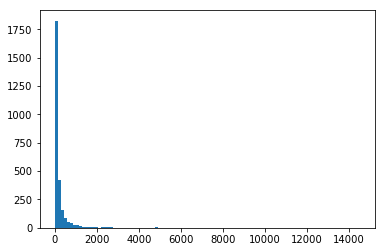

In [7]:

plt.hist(df["HM01_UR_RPKM"], 100);


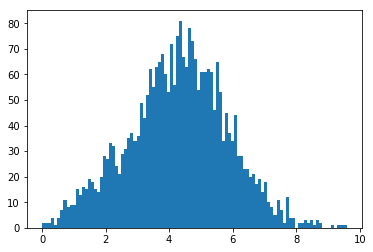

In [9]:
plt.hist(np.log(df["HM01_UR_RPKM"] +1),100);

In [10]:
#Normalization Function
def invnorm(x):
    return scipy.stats.norm.ppf((x.rank() -0.5)/x.count())

In [11]:
cc_norm = df.apply(invnorm)

In [12]:
#Based on saturation curves
strain_qual = {'good':["HM56", "HM14", "HM43", "HM54", "HM86"],
              'okay':["HM01", "HM03", "HM06", "HM68"],
              'so-so':["HM57", "HM17", "HM07" "HM60"],
              'bad': ["HM66"]}

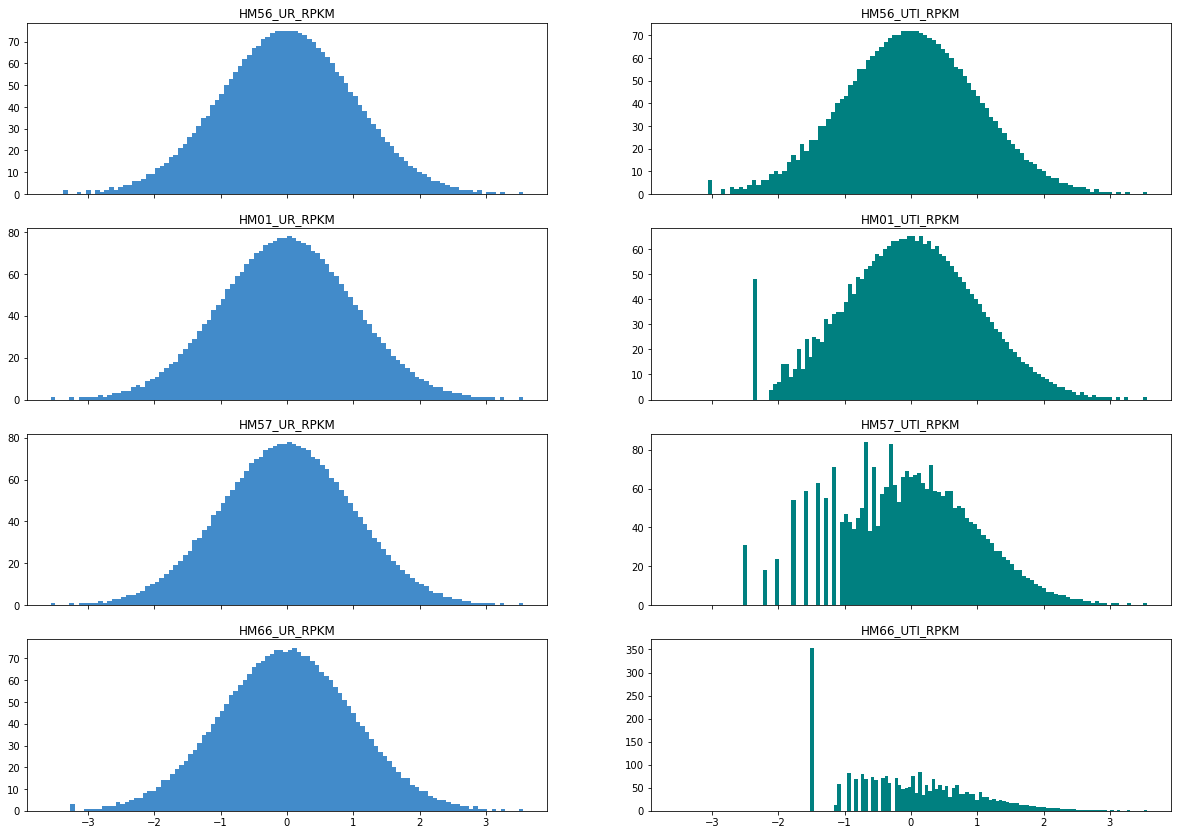

In [60]:
fig, ((ax1, ax2), (ax3, ax4),
     (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex=True)

fig.set_size_inches(20.5, 14.5)
axs = [ax1,ax2,ax3,ax4, ax5, ax6, ax7, ax8]
cond = ["UR", "UTI"]
row = 0
for key, val in strain_qual.items():
    ur_sample = val[0]+ "_UR_RPKM"
    uti_sample = val[0] + "_UTI_RPKM"
    axs[row].hist(cc_norm[ur_sample], 100, color = "#428bca")
    axs[row].set_title(ur_sample, fontsize=12)
    axs[row+1].hist(cc_norm[uti_sample], 100, color = "#008080")
    axs[row+1].set_title(uti_sample, fontsize=12)
    row += 2
plt.savefig("../figures/read_count_distribution_example.png", dpi=500)
plt.show()

In [22]:

#Using seaborn
import seaborn as sns; sns.set_style("ticks")

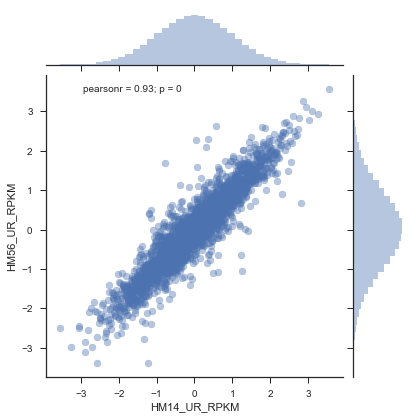

In [70]:
#As an example pick two good ones

v1 = cc_norm["HM14_UR_RPKM"]
v2 = cc_norm["HM56_UR_RPKM"]
f = sns.jointplot(v1, v2, alpha=0.4);
f.savefig("../figures/HM14_UR_vs_HM56_UR.png", dpi = 500)

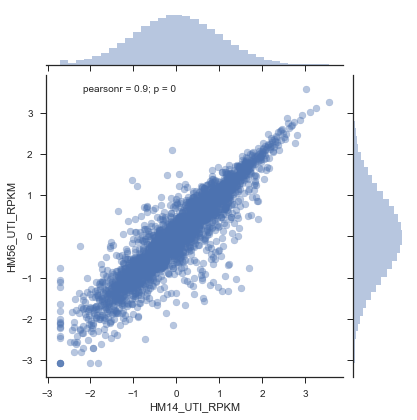

In [71]:
v1 = cc_norm["HM14_UTI_RPKM"]
v2 = cc_norm["HM56_UTI_RPKM"]
f = sns.jointplot(v1, v2, alpha=0.4);
f.savefig("../figures/HM14_UTI_vs_HM56_UTI.png", dpi = 500)

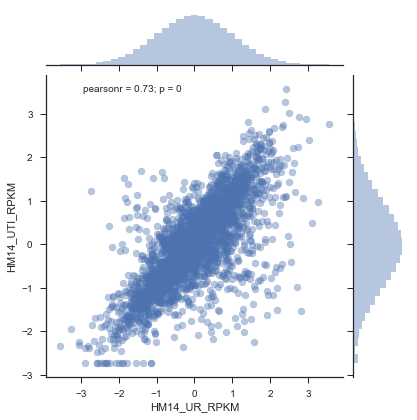

In [72]:
v1 = cc_norm["HM14_UR_RPKM"]
v2 = cc_norm["HM14_UTI_RPKM"]
f = sns.jointplot(v1, v2, alpha=0.4);
f.savefig("../figures/HM14_UTI_vs_HM14_UR.png", dpi = 500)

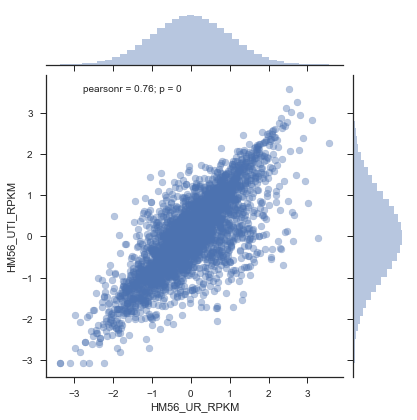

In [73]:
v1 = cc_norm["HM56_UR_RPKM"]
v2 = cc_norm["HM56_UTI_RPKM"]
f = sns.jointplot(v1, v2, alpha=0.4);
f.savefig("../figures/HM56_UTI_vs_HM56_UR.png", dpi = 500)

In [74]:
def generateSamples(cc_norm):
    strain_qualities = {'best':["HM56", "HM14", "HM43", "HM54", "HM86"],
              'good':["HM56", "HM14", "HM43", "HM54", "HM86","HM01", "HM03", "HM06", "HM68"],
              'bad': ["HM07", "HM17", "HM57" "HM60","HM66"],
                       "B1":["HM03", "HM07", "HM14", "HM60"], 
                       "B2":["HM56", "HM43", "HM54", "HM86", "HM06", "HM68", "HM57", "HM66", "HM17"]
                  
                       }

    uti_col=[c for c in list(cc_norm.columns) if "UTI" in c]
    ur_col = [c for c in list(cc_norm.columns) if "UR" in c]
    B2_col = [c for c in list(cc_norm.columns) if c.split("_")[0] in strain_qualities["B2"]]
    B1_col = [c for c in list(cc_norm.columns) if c.split("_")[0] in strain_qualities["B1"]]
    main_tuples = {"all_urine":list(itertools.combinations(ur_col, 2)),
                  "all_uti":list(itertools.combinations(uti_col, 2)), 
                  "all_urine_uti":list(itertools.product(ur_col, uti_col)),
                "all_matched_urine_uti":list((ur, uti) for ur, uti in zip(ur_col, uti_col)),
                  "B1_B2_urine": list(itertools.product(list(set(B2_col) & set(ur_col)), 
                                                       list(set(B1_col) & set(ur_col)))),
                  "B1_B2_uti": list(itertools.product(list(set(B2_col) & set(uti_col)), 
                                                       list(set(B1_col) & set(uti_col))))
                  }
    
    other_conditions = {}
    for key in strain_qualities.keys():
        for u in ['urine', 'uti', 'urine_uti', 'matched_urine_uti']:
            other_conditions["{}_{}".format(key, u)] = [tu for tu in main_tuples["all_{}".format(u)] if all([t.split("_")[0] in strain_qualities[key] for t in tu])]
   
    return {**main_tuples, **other_conditions}

In [75]:
def calcCorr(strains, df): # list of tuples and df where each element of tuple is a column
    strain_names = ["{}|{}".format(tu[0].split("_")[0], tu[1].split("_")[0]) for tu in strains]
    #return [strain_names, [df[strains[0]].corr(df[strains[1]], method='pearson')]]
    return [strain_names,[df[strain[0]].corr(df[strain[1]], method='pearson') for strain in strains]]

In [76]:
samples = generateSamples(cc_norm)

strain_collection_dict = {}
for key, val in samples.items():
    strain_collection_dict[key] =calcCorr(val, cc_norm)
    

In [77]:
def pearsonToDF(strain_collection_dict): #{"UR|UR": [strains, pearson]}
    all_samples = []
    for key, val in strain_collection_dict.items():
        sample = key
        strains = val[0]
        pearson = val[1]
        final_dict = {"sample":[sample]*len(strains), "strains":strains, "pearson":pearson }
        all_samples.append({"sample":[sample]*len(strains), "strains":strains, "pearson":pearson })
    return pd.concat([pd.DataFrame(l) for l in all_samples])
    #return all_samples

In [78]:
final_df = pearsonToDF(strain_collection_dict)
    
    #something like this

In [79]:
final_df.head()

,pearson,sample,strains
0,0.912882,all_urine,HM01|HM03
1,0.909407,all_urine,HM01|HM06
2,0.882894,all_urine,HM01|HM07
3,0.925714,all_urine,HM01|HM14
4,0.886857,all_urine,HM01|HM17


In [82]:
def plotCorr(data, name):
    sns.set_style("ticks")
    plt.figure(figsize=(7,7))
    ax = sns.boxplot(x = "sample", y = "pearson", data = data, palette="Set2", width=.5, showfliers=False)
    ax = sns.swarmplot(x = "sample", y = "pearson", data = data, color = 'black', alpha = 0.4)
    ax.set(xlabel='', ylabel='Pearson Correlation')
    ax.set_xticklabels(["UR|UR", "UTI|UTI", "UR|UTI", "UR|UTI:matched"] )
    plt.ylim(0.5, 1)
    plt.savefig("../figures/{}".format(name), dpi = 500)
    plt.show()

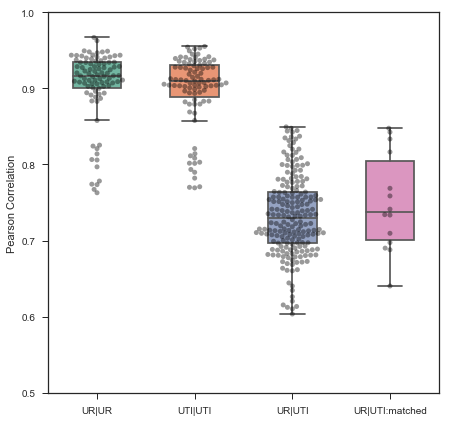

In [83]:
all_corr = final_df[['all' in s for s in final_df['sample']] ]
plotCorr(all_corr, "all_samples_correlations.png")

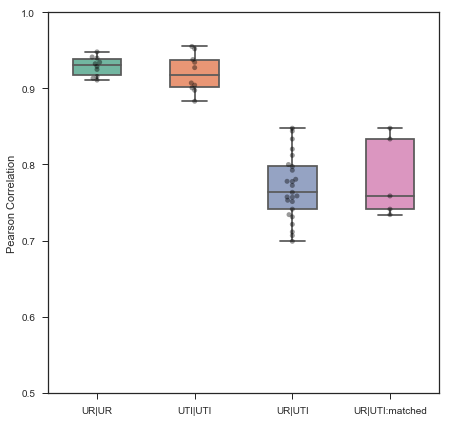

In [84]:
best_corr = final_df[['best' in s for s in final_df['sample']] ]
plotCorr(best_corr, "best_samples_correlation.png")

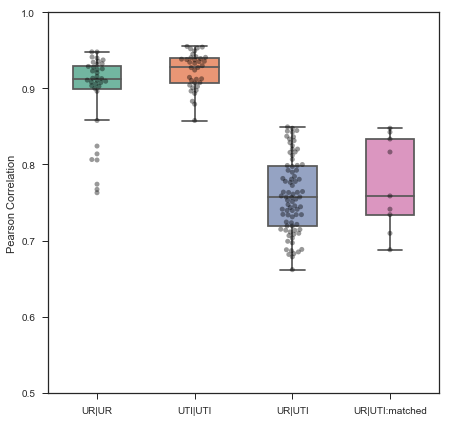

In [85]:
good_corr = final_df[['good' in s for s in final_df['sample']] ]
plotCorr(good_corr, "good_samples_correlation.png")

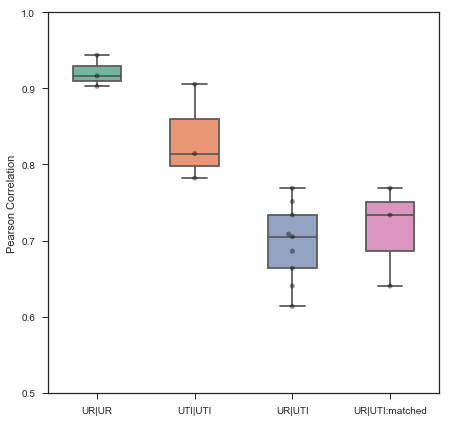

In [86]:
bad_corr = final_df[['bad' in s for s in final_df['sample']] ]
plotCorr(bad_corr, "bad_samples_correlation.png")

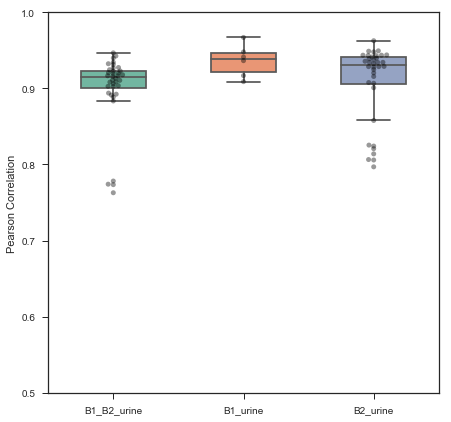

In [29]:
B2_corr = final_df[[ s in ['B1_urine', 'B2_urine', 'B1_B2_urine'] for s in final_df['sample'] ]]
plotCorr(B2_corr)

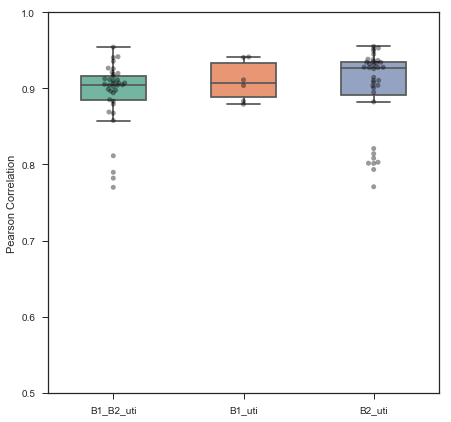

In [30]:
B2_corr = final_df[[ s in ['B1_uti', 'B2_uti', 'B1_B2_uti'] for s in final_df['sample'] ]]
plotCorr(B2_corr)

In [13]:
pca_table = cc_norm.T
pca_table.head()

CFT073,c0003,c0004,c0005,c0010,c0011,c0012,c0013,c0015,c0016,c0017,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
HM01_UR_RPKM,0.255722,0.212231,-0.196264,0.427533,-0.863450,2.193701,0.380619,-0.558484,-1.326763,-1.396484,...,0.966932,0.185959,-0.095812,0.872836,-0.788407,-0.416473,-0.442702,-0.872836,0.780898,-0.561712
HM03_UR_RPKM,0.117090,-0.129139,-0.219764,0.566026,-0.882300,2.154606,0.097661,-0.585569,-1.383194,-1.594493,...,0.965465,0.049693,0.593230,0.803560,-1.476475,-0.503406,-1.023535,-0.317067,0.468212,-0.367793
HM06_UR_RPKM,-0.090269,0.137492,-0.314167,0.790920,-0.842277,2.204020,0.224478,-0.265239,-1.682473,-1.413764,...,1.418780,0.151434,1.365455,1.213460,-1.449651,0.035882,-0.721136,-0.909785,0.729513,-0.748246
HM07_UR_RPKM,0.275734,-0.040945,-0.348178,0.616424,-0.897333,2.193701,-0.023919,-0.636572,-1.452286,-1.684370,...,1.016570,0.170071,0.474379,0.864787,-1.374862,0.062592,-0.250499,-0.477470,0.575770,-0.942269
HM14_UR_RPKM,0.215055,0.111534,-0.184087,0.580118,-0.874183,2.283765,0.152365,-0.709257,-1.085279,-1.121633,...,1.122497,0.269529,0.290096,0.772193,-1.367795,-0.225422,-0.809928,-0.965465,0.515975,-0.229197


In [87]:
from sklearn.decomposition import PCA

def findTwoComponents(df):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(df)
    pDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
    pDf.set_index(df.index, inplace=True)
    pc1_var = round(pca.explained_variance_ratio_[0]*100, 2)
    pc2_var = round(pca.explained_variance_ratio_[1]*100, 2)
    B1 = ["HM01", "HM03", "HM07", "HM14", "HM60"]
    pDf['names'] = [c.split("_")[1] for c in  pDf.index]
    pDf['phylo'] = ["B1" if c.split("_")[0] in B1 else 'B2' for c in pDf.index]
    pDf.index = [c.split("_RPKM")[0] for c in pDf.index]
    return pDf, pc1_var, pc2_var

principalDf, pc1_var, pc2_var = findTwoComponents(pca_table)
principalDf.head()

,PC1,PC2,names,phylo
HM01_UR,17.970983,0.798667,UR,B1
HM03_UR,18.590057,3.971661,UR,B1
HM06_UR,13.041494,1.921488,UR,B2
HM07_UR,18.017768,4.049694,UR,B1
HM14_UR,18.419159,2.168837,UR,B1


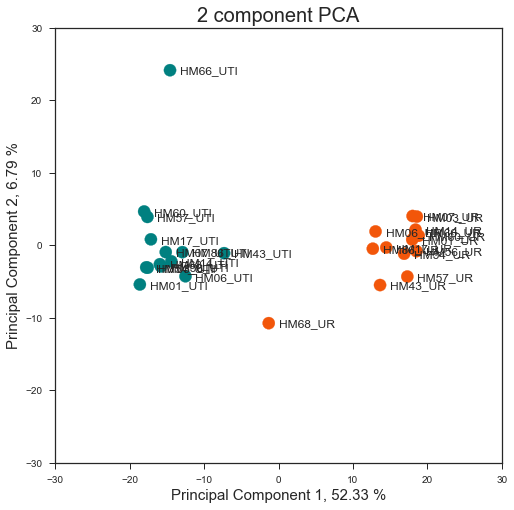

In [89]:
def plotPCA(pDf, pc1_var, pc2_var, limits, colors, labels, name):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1, {} %'.format(pc1_var), fontsize = 15)
    ax.set_ylabel('Principal Component 2, {} %'.format(pc2_var), fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    ax = plt.scatter(pDf.PC1, pDf.PC2, c=colors, s = 150)
    for label, pc1, pc2 in zip(labels, pDf.PC1, pDf.PC2):
        #print(label, pc1, pc2)
        plt.annotate(label, xy=(pc1,pc2), xytext = (10, -5), textcoords="offset points")
    #plt.legend(handles=[ax], loc=1)
    plt.xlim(limits)
    plt.ylim(limits)
    plt.savefig("../figures/{}".format(name), dpi = 500)

labels = principalDf.index
colors = {"UR":"#f2560a", "UTI":"#008080", "B1":"y", "B2": "g"}
condition_colors = [colors[principalDf.loc[i].names] for i in list(principalDf.index)] 
phylo_colors = [colors[principalDf.loc[i].phylo] for i in list(principalDf.index)] 

plotPCA(principalDf, pc1_var, pc2_var, (-30, 30), condition_colors, labels, "all_samples_pca.png")


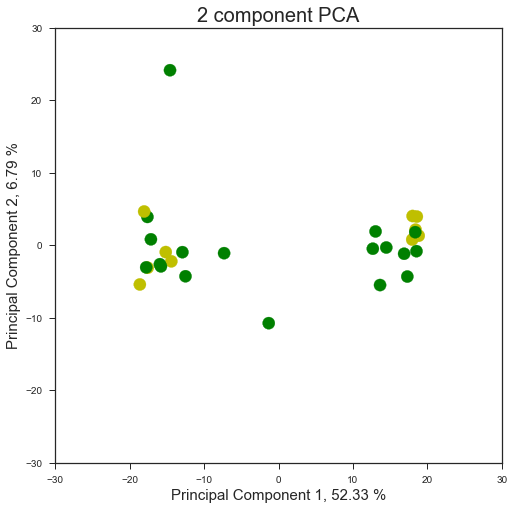

In [91]:
plotPCA(principalDf, pc1_var, pc2_var, (-30, 30), phylo_colors, labels=[], name="all_samples_pca_by_phylo.png")        

In [48]:
strain_qualities = {'best':["HM56", "HM14", "HM43", "HM54", "HM86"],
              'good':["HM56", "HM14", "HM43", "HM54", "HM86","HM01", "HM03", "HM06", "HM68"],
              'bad': ["HM07", "HM17", "HM57", "HM60","HM66"],
                       "B1":["HM03", "HM07", "HM14", "HM60"], 
                       "B2":["HM56", "HM43", "HM54", "HM86", "HM06", "HM68", "HM57", "HM66", "HM17"]}



In [18]:
best_pca = cc_norm.T[[c.split("_")[0] in strain_qualities['best'] for c in cc_norm.T.index]]
best_pDf, best_pvar1, best_pvar2 = findTwoComponents(best_pca)

In [19]:
best_pDf.head()

,PC1,PC2,names,phylo
HM14_UR,-17.242021,5.991455,UR,B1
HM43_UR,-12.777857,4.057942,UR,B2
HM54_UR,-16.232543,-2.325783,UR,B2
HM56_UR,-17.815054,-2.209814,UR,B2
HM86_UR,-11.817259,-5.370066,UR,B2


Index(['HM14_UR', 'HM43_UR', 'HM54_UR', 'HM56_UR', 'HM86_UR', 'HM14_UTI',
       'HM43_UTI', 'HM54_UTI', 'HM56_UTI', 'HM86_UTI'],
      dtype='object')


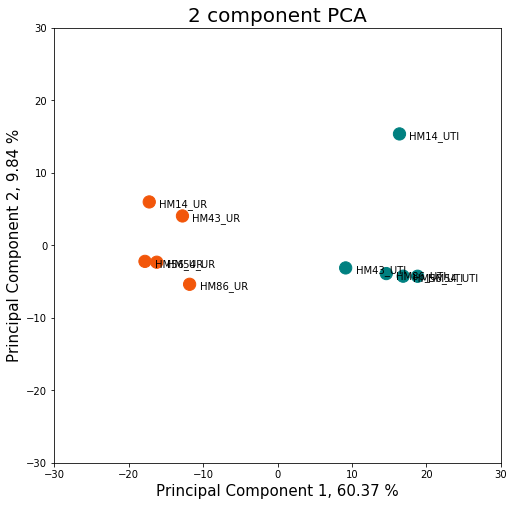

In [20]:
best_colors = [colors[best_pDf.loc[i].names] for i in list(best_pDf.index)]

labels = best_pDf.index
print(labels)
plotPCA(best_pDf, best_pvar1, best_pvar2, (-30, 30), best_colors, labels)

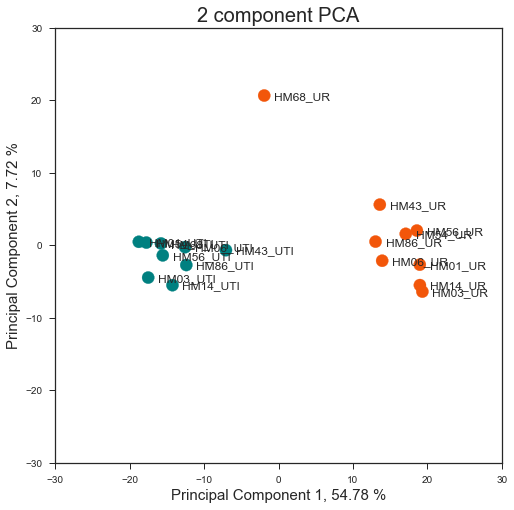

In [92]:
good_pca = cc_norm.T[[c.split("_")[0] in strain_qualities['good'] for c in cc_norm.T.index]]
good_pDf, good_pvar1, good_pvar2 = findTwoComponents(good_pca)
good_colors = [colors[good_pDf.loc[i].names] for i in list(good_pDf.index)]
labels = good_pDf.index
plotPCA(good_pDf, good_pvar1, good_pvar2, (-30, 30), good_colors, labels, "good_samples_pca.png")

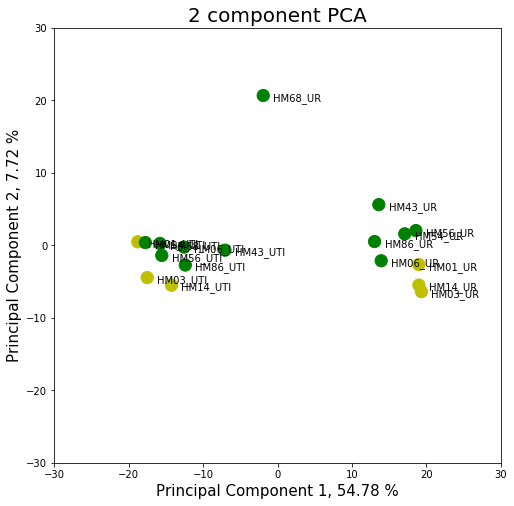

In [22]:
good_p_colors = [colors[good_pDf.loc[i].phylo] for i in list(good_pDf.index)]
labels = good_pDf.index
plotPCA(good_pDf, good_pvar1, good_pvar2, (-30, 30), good_p_colors, labels)

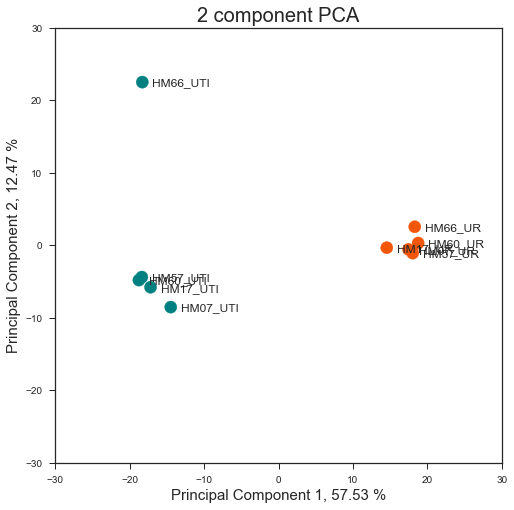

In [41]:
bad_pca = cc_norm.T[[c.split("_")[0] in strain_qualities['bad'] for c in cc_norm.T.index]]
bad_pDf, bad_pvar1, bad_pvar2 = findTwoComponents(bad_pca)
bad_colors = [colors[bad_pDf.loc[i].names] for i in list(bad_pDf.index)]
labels = bad_pDf.index
plotPCA(bad_pDf, bad_pvar1, bad_pvar2, (-30, 30), bad_colors, labels)

In [23]:
best_cc_norm = cc_norm.T[[c.split("_")[0] in strain_qualities['best'] for c in cc_norm.T.index]]
pca = PCA(n_components=2)
pDf = pca.fit_transform(best_cc_norm)
comp_df = pd.DataFrame(pca.components_.T)
comp_df.index = best_cc_norm.T.index
comp_df.columns = ["pc1", "pc2"]
t = comp_df.pc2.abs()
t = t.sort_values(ascending=False)
t

CFT073
c0217    0.126472
c1343    0.116750
c4323    0.109184
c1344    0.101138
c1345    0.100960
c1342    0.098589
c2337    0.095283
c2908    0.089060
c2613    0.088261
c1347    0.086395
c5265    0.085695
c0423    0.079441
c2910    0.079222
c0424    0.078947
c1348    0.077612
c3293    0.077149
c4899    0.076744
c1349    0.076644
c1341    0.076298
c2294    0.076007
c0422    0.075652
c2909    0.074661
c4410    0.073253
c5121    0.072266
c2696    0.071815
c1346    0.071663
c0683    0.071525
c2336    0.069416
c2904    0.068427
c4320    0.067793
           ...   
c1987    0.000205
c0819    0.000195
c4151    0.000189
c4432    0.000188
c1012    0.000169
c1107    0.000165
c4254    0.000147
c0043    0.000143
c4792    0.000135
c1084    0.000133
c2022    0.000129
c3088    0.000119
c4446    0.000112
c0388    0.000108
c2205    0.000102
c2329    0.000102
c4939    0.000099
c1845    0.000098
c0128    0.000088
c2160    0.000087
c0110    0.000080
c3806    0.000080
c3789    0.000078
c0204    0.000072
c40

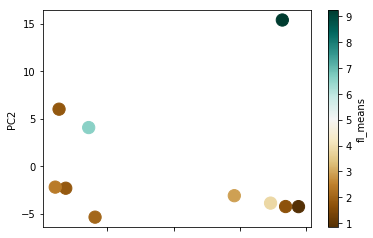

In [25]:
import numpy as np
flagella = ["c1342", "c1343", "c1344", "c1345"]

flagella_genes = df.T[flagella]
flagella_genes.index = [c.split("_RPKM")[0] for c in flagella_genes.index]
x = np.log2(flagella_genes.mean(axis = 1)+1)
#x = flagella_genes.mean(axis = 1)
principalDf['fl_means'] = x
good_pDf['fl_means'] = x
best_pDf['fl_means'] = x
#principalDf.head()

best_pDf.plot.scatter("PC1", "PC2", c="fl_means", s = 150, colormap='BrBG')

In [425]:
aga = best_pca[["c3887", "c3888", "c3889", "c3890", "c3891","c3892", "c3893"]]

aga['names'] = [c.split("_")[1] for c in aga.index]
aga

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


CFT073,c3887,c3888,c3889,c3890,c3891,c3892,c3893,names
HM14_UR_RPKM,0.494031,0.651285,0.437634,0.338421,0.757405,-0.040485,1.081970,UR
HM43_UR_RPKM,-0.475409,-0.372719,-0.316100,-0.510204,-0.092116,-0.633758,0.576856,UR
HM54_UR_RPKM,0.518078,0.342320,0.379630,0.273824,0.624229,-0.057984,0.968401,UR
HM56_UR_RPKM,0.636572,0.681145,0.673047,0.677669,1.008890,0.374692,1.326763,UR
HM86_UR_RPKM,1.039981,0.990694,0.993704,0.844903,1.129432,0.440673,1.498725,UR
HM14_UTI_RPKM,-2.164073,-1.523209,-2.003370,-1.781307,-0.708074,-1.448337,-1.690098,UTI
HM43_UTI_RPKM,-1.435331,-1.197292,-1.228971,-1.079495,-0.702177,-1.211541,-1.309223,UTI
HM54_UTI_RPKM,-2.081030,-2.225390,-1.835565,-1.688183,-0.940120,-1.363122,-1.544081,UTI
HM56_UTI_RPKM,-1.738051,-2.049974,-1.729779,-1.692020,-0.925199,-1.340190,-1.535054,UTI
HM86_UTI_RPKM,-1.121633,-0.948020,-0.993704,-1.076207,-0.619764,-0.973560,-0.900778,UTI


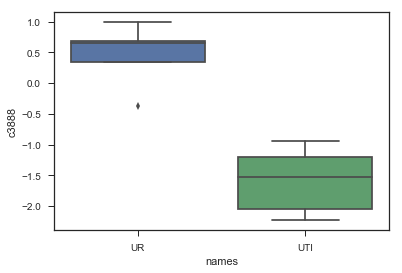

In [436]:
sns.boxplot(x = 'names', y = "c3888", data = aga)

In [5]:
flagstat = "/Users/annasintsova/git_repos/HUTI-RNAseq/data/counts/flagstat/flagstat_summary.txt"
fl= pd.read_csv(flagstat, index_col = 0)
fl.index = [c.split("_trimmed")[0] for c in fl.index]
principalDf['mapped'] = fl.percent_mapped*100
good_pDf['%_reads_mapped_to_genome'] = fl.percent_mapped*100
fl.head()
good_pDf.head()

NameError: name 'principalDf' is not defined

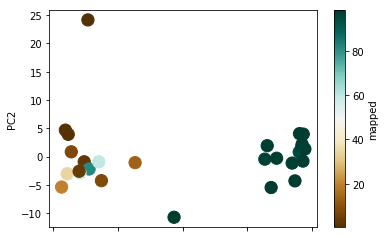

In [35]:
principalDf.plot.scatter("PC1", "PC2", c="mapped", s = 150, colormap='BrBG')

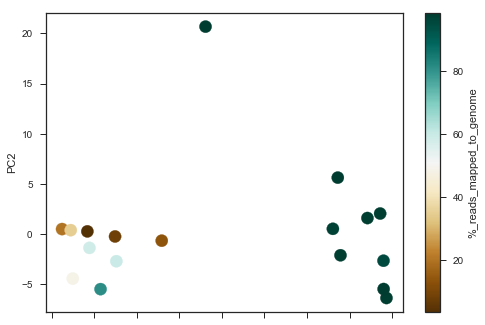

In [116]:


ax = good_pDf.plot.scatter("PC1", "PC2", c="%_reads_mapped_to_genome", s = 150, colormap='BrBG')
#ax.set_aspect('equal')
#ax.scatter(x="PC1", y="PC2", c= "%_reads_mapped_to_genome", data=good_pDf, s = 150)



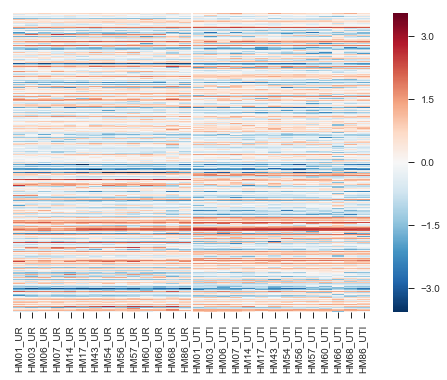

In [132]:
hm_df = cc_norm.copy()
hm_df.index.name = ""
hm_df.columns = [c.split("_RPKM")[0] for c in hm_df.columns]
ax = sns.heatmap(hm_df, yticklabels=False)
ax.vlines([14], *ax.get_ylim(), colors="white")

#### 2018-03-05

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11dc5b0f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11dcbf2e8>], dtype=object)

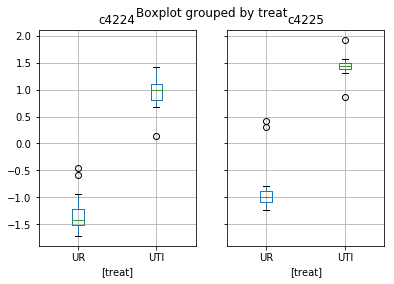

In [20]:
gnt = cc_norm.loc[["c4224", "c4225"]].T
gnt['treat'] = [c.split("_")[1] for c in gnt.index]
gnt.boxplot(by="treat")

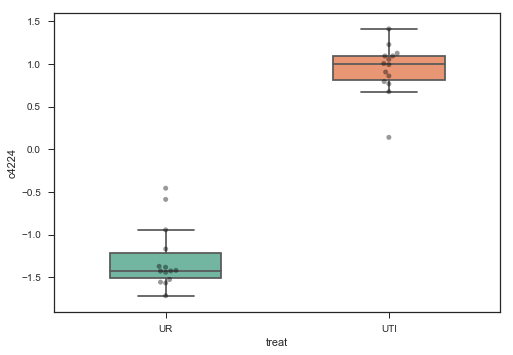

In [28]:
ax = sns.boxplot(x = "treat", y = "c4224", data = gnt, palette="Set2", width=.5, showfliers=False)
ax = sns.swarmplot(x = "treat", y = "c4224", data = gnt, color = 'black', alpha = 0.4)


In [29]:
tips = sns.load_dataset("tips")

In [30]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [53]:
#Preparing count table for DEseq 
df2 = count_mat.join(data['MG1655'])
df2.set_index('MG1655', inplace=True)
df2.sort_index(inplace=True)
col_names = sorted([tuple(c.split("_")) for c in df2.columns], key=itemgetter(1,0))
col_names = ["_".join(c) for c in col_names]
df2 = df2[col_names]
df3 = df2.dropna()
df3.reset_index()
df4 = df3.reset_index().dropna().set_index('MG1655')
df4 = df4[[c for c in df4.columns if "counts" in c and "seq" not in c]]
df4.columns = [c.split("_counts")[0] for c in df4.columns]
df4.to_csv("/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-03-06-DEseq2-analysis/data/core_counts.csv")
best = df4[[c for c in df4.columns if c.split("_")[0] in strain_qualities['best']]]
best.to_csv("/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-03-06-DEseq2-analysis/data/best_counts.csv")
good = df4[[c for c in df4.columns if c.split("_")[0] in strain_qualities['good']]]
good.to_csv("/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-03-06-DEseq2-analysis/data/good_counts.csv")





In [47]:
meta = pd.DataFrame(data = [ [c.split("_")[0] for c in df4.columns],[c.split("_")[1] for c in df4.columns]],
                    columns = df4.columns, index = ["strain", "treatment"]).T
meta.to_csv("/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-03-06-DEseq2-analysis/data/coldata.csv")

In [5]:
count_mat.head()

,HM01_UR_RPKM,HM01_UTI_counts,HM01_UTI_RPKM,HM03_UR_counts,HM03_UR_RPKM,HM03_UTI_counts,HM03_UTI_RPKM,HM06_UR_counts,HM06_UR_RPKM,HM06_UTI_counts,...,HM57_UTI_seq2_counts,HM57_UTI_seq2_RPKM,HM60_UTI_seq1_counts,HM60_UTI_seq1_RPKM,HM60_UTI_seq2_counts,HM60_UTI_seq2_RPKM,HM68_UTI_seq1_counts,HM68_UTI_seq1_RPKM,HM68_UTI_seq2_counts,HM68_UTI_seq2_RPKM
1_thrL.faa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_Hypothetical_protein.faa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6_Hypothetical_protein.faa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8_Hypothetical_protein.faa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9_Hypothetical_protein.faa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data.columns[16:]

Index(['HM01_UR_counts', 'HM01_UR_RPKM', 'HM01_UTI_counts', 'HM01_UTI_RPKM',
       'HM03_UR_counts', 'HM03_UR_RPKM', 'HM03_UTI_counts', 'HM03_UTI_RPKM',
       'HM06_UR_counts', 'HM06_UR_RPKM', 'HM06_UTI_counts', 'HM06_UTI_RPKM',
       'HM07_UR_counts', 'HM07_UR_RPKM', 'HM07_UTI_counts', 'HM07_UTI_RPKM',
       'HM14_UR_counts', 'HM14_UR_RPKM', 'HM14_UTI_counts', 'HM14_UTI_RPKM',
       'HM17_UR_counts', 'HM17_UR_RPKM', 'HM17_UTI_counts', 'HM17_UTI_RPKM',
       'HM43_UR_counts', 'HM43_UR_RPKM', 'HM43_UTI_counts', 'HM43_UTI_RPKM',
       'HM54_UR_counts', 'HM54_UR_RPKM', 'HM54_UTI_counts', 'HM54_UTI_RPKM',
       'HM56_UR_counts', 'HM56_UR_RPKM', 'HM56_UTI_counts', 'HM56_UTI_RPKM',
       'HM57_UR_counts', 'HM57_UR_RPKM', 'HM57_UTI_counts', 'HM57_UTI_RPKM',
       'HM60_UR_counts', 'HM60_UR_RPKM', 'HM60_UTI_counts', 'HM60_UTI_RPKM',
       'HM68_UR_counts', 'HM68_UR_RPKM', 'HM68_UTI_counts', 'HM68_UTI_RPKM',
       'HM66_UR_counts', 'HM66_UR_RPKM', 'HM66_UTI_counts', 'HM66_UTI_RPKM',